In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

from commons import get_word_count_maps, get_bigram_count_maps

%matplotlib inline

In [2]:
df =  pd.read_csv('amazon_mp3.csv', header=None, names=['productName', 'title', 'fullText', 'rating'],
                  dtype={'productName': object, 'title': object, 'fullText': object, 'rating': np.int32})

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30999 entries, 0 to 30999
Data columns (total 4 columns):
productName    30999 non-null object
title          30999 non-null object
fullText       30999 non-null object
rating         30999 non-null int32
dtypes: int32(1), object(3)
memory usage: 1.1+ MB


## Distribution of different rating scores

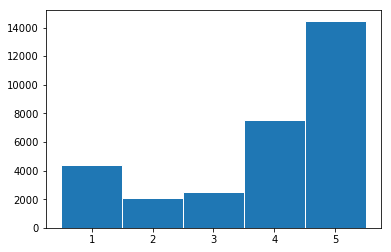

In [5]:
df['rating'].hist(bins=5, range=[.5, 5.5], grid=False, edgecolor='w',)

Most of the users are extreamly happy with the products. But there are a significan portaion of users (ratings 1 and 2) who are not satisfied with the product. We are interested in finidng what makes consumers like about the product and what makes consumers not like of the product.

## Statistically Over-represented words analysis for good reviews versus bad reviews

In [6]:
df_counts = get_word_count_maps(df)

### Top statistically over-represented words associated with positive reviews

In [7]:
df_counts.head(25)

,word,globalCount,goodCount,badCount,zScore
6144,easy,8846,7934,468,19.199211
19490,is,70659,53765,10992,18.112633
22280,great,14148,11955,1310,18.074608
7247,love,5477,4983,274,15.679467
30480,sound,8758,7119,971,11.568239
18192,ipod,27472,21077,4349,11.351689
16440,very,14042,11076,1935,11.036908
10386,video,6797,5572,706,10.866820
623,small,4788,4006,400,10.670364
5536,little,6190,5077,648,10.338309


(-0.5, 399.5, 199.5, -0.5)

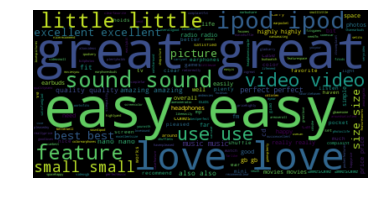

In [8]:
num_words = 100
text = ""
for count, word in zip(df_counts.head(num_words).zScore, df_counts.head(num_words).word):
    count = int(count)
    text = text + " ".join([word]*count)
    
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Top statistically over-represented words associated with negative reviews

In [9]:
df_counts.iloc[::-1].head(25)

,word,globalCount,goodCount,badCount,zScore
574,customer,1558,433,981,-19.526410
17689,support,2744,1061,1391,-18.902374
31662,after,7645,3936,2941,-18.727675
20811,warranty,1108,257,743,-18.104462
23757,back,4845,2341,1956,-16.932378
1375,they,11479,6493,3885,-16.829853
6271,return,1016,251,654,-16.573874
32620,not,23888,14486,6953,-16.134179
32816,service,1989,788,1026,-16.105638
21426,stopped,765,176,528,-15.380834


(-0.5, 399.5, 199.5, -0.5)

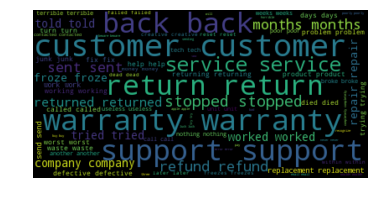

In [10]:
num_words = 100
text = ""
for count, word in zip(df_counts.iloc[::-1].head(num_words).zScore, df_counts.iloc[::-1].head(num_words).word):
    count = int(-1 * count)
    text = text + " ".join([word]*count)
    
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Statistically Over-represented bigram analysis for good reviews versus bad reviews

In [11]:
df_bigram_counts = get_bigram_count_maps(df)

### Top statistically over-represented bigrams associated with positive reviews

In [12]:
df_bigram_counts.head(25)

,bigram,globalCount,goodCount,badCount,zScore
203516,easy_to,6591,5967,316,17.169401
285952,i_love,3377,3113,142,12.956463
154789,the_best,2843,2554,167,10.681324
12748,is_great,2672,2381,143,10.378565
96160,love_it,1636,1566,43,10.109277
258995,a_great,3495,2993,284,9.753125
128846,very_easy,1388,1299,43,8.832540
359182,you_can,7686,6081,1009,8.663637
11488,to_use,7396,5866,973,8.560794
161475,is_very,2964,2495,262,8.333546


(-0.5, 399.5, 199.5, -0.5)

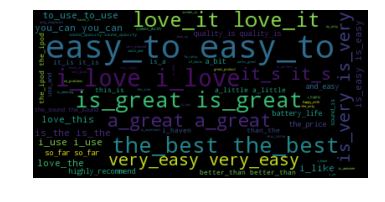

In [13]:
num_words = 100
text = ""
for count, bigram in zip(df_bigram_counts.head(num_words).zScore, df_bigram_counts.head(num_words).bigram):
    count = int(count)
    text = text + " ".join([bigram]*count)
    
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Top statistically over-represented bigrams associated with negative reviews

In [14]:
df_bigram_counts.iloc[::-1].head(25)

,bigram,globalCount,goodCount,badCount,zScore
136761,customer_service,939,223,630,-16.577413
39340,it_back,1027,314,596,-14.419973
304952,stopped_working,458,78,349,-13.467339
69329,would_not,840,260,486,-12.949321
297852,i_tried,1002,346,522,-12.409085
116295,to_return,481,102,318,-12.050747
75345,tried_to,683,195,376,-11.582621
180970,the_problem,756,256,397,-10.949876
353222,t_work,750,258,384,-10.603382
275339,back_to,1104,472,518,-10.461185


(-0.5, 399.5, 199.5, -0.5)

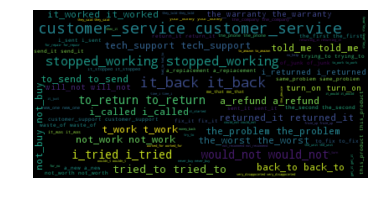

In [15]:
num_words = 100
text = ""
for count, bigram in zip(df_bigram_counts.iloc[::-1].head(num_words).zScore,
                       df_bigram_counts.iloc[::-1].head(num_words).bigram):
    count = int(-1 * count)
    text = text + " ".join([bigram]*count)
    
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")